#Model Creation
In this demo we'll be creating different types of regression models. Note that we'll be using a dataset obtained from Kaggle that contains information about a person and corresponding medical costs. Alternatively, use a smaller dataset if you'd like something more approachable (data in the presentation google drive folder). This demo will focus on creating models, and visualizing the results.

#Large Dataset

##Imports

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.5 MB/s 


In [ ]:
#Note: using "as" allows us to specify a name to call a library without having to use the fully qualified name
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Load and Process Data (Small Dataset)

In [ ]:
#Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
dataset = pd.read_csv("insurance.csv")


In [ ]:
cols = dataset.columns
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
ct = ce.one_hot.OneHotEncoder(cols=['sex', 'smoker', 'region'], drop_invariant=True, return_df=True)

dataset = ct.fit_transform(dataset)

In [ ]:
dataset = dataset.drop(columns=['sex_2', 'smoker_2', 'region_4'])
dataset

In [ ]:
dataset

,age,sex_1,bmi,children,smoker_1,region_1,region_2,region_3,charges
0,19,1,27.900,0,1,1,0,0,16884.92400
1,18,0,33.770,1,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,1,0,4449.46200
3,33,0,22.705,0,0,0,0,1,21984.47061
4,32,0,28.880,0,0,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,0,1,10600.54830
1334,18,1,31.920,0,0,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,1,0,1629.83350
1336,21,1,25.800,0,0,1,0,0,2007.94500


In [ ]:
#x = dataset.Level
#y = dataset.Salary

x = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)

print(x)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#For visualizing
age = (sc.inverse_transform(X_test))[:, 0]
age

array([19., 57., 51., 49., 21., 31., 49., 56., 27., 37., 60., 54., 39.,
       42., 18., 48., 33., 35., 59., 62., 52., 30., 46., 50., 18., 41.,
       43., 48., 33., 30., 56., 34., 53., 19., 48., 53., 30., 21., 58.,
       45., 28., 58., 50., 59., 31., 60., 20., 28., 51., 57., 61., 55.,
       24., 45., 18., 32., 43., 60., 23., 18., 29., 61., 23., 23., 60.,
       48., 49., 57., 19., 24., 52., 31., 19., 54., 62., 43., 23., 29.,
       56., 50., 21., 55., 53., 24., 40., 25., 42., 44., 49., 41., 35.,
       49., 60., 48., 19., 53., 51., 56., 58., 35., 57., 25., 30., 19.,
       64., 23., 19., 45., 18., 55., 34., 26., 19., 63., 24., 19., 33.,
       63., 35., 20., 50., 48., 38., 46., 56., 48., 55., 35., 42., 44.,
       18., 19., 38., 33., 46., 19., 19., 18., 52., 45., 62., 35., 34.,
       64., 58., 55., 18., 41., 18., 37., 44., 26., 52., 55., 48., 42.,
       51., 51., 48., 23., 33., 64., 58., 26., 32., 21., 36., 54., 56.,
       36., 32., 28., 56., 59., 27., 38., 23., 59., 28., 35., 60

##Linear Models

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

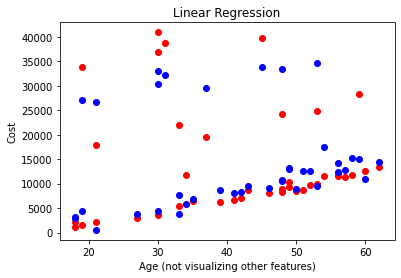

In [ ]:
plt.scatter(age[0:40], y_test[0:40], color = 'red')
plt.scatter(age[0:40], lin_reg.predict(X_test)[0:40], color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Age (not visualizing other features)')
plt.ylabel('Cost')
plt.show()

In [ ]:
lin_reg.predict(sc.transform([[19, 1, 28, 0, 0, 1, 0, 0]]))

array([[1697.08466862]])

##Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression()

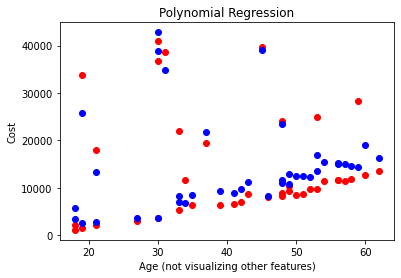

In [ ]:
plt.scatter(age[0:40], y_test[0:40], color = 'red')
plt.scatter(age[0:40], lin_reg_2.predict(poly_reg.transform(X_test))[0:40], color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Age (not visualizing other features)')
plt.ylabel('Cost')
plt.show()

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform(sc.transform([[19, 1, 28, 0, 0, 1, 0, 0]])))

array([[3726.]])

##SVM (Linear and Non-Linear Kernel)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
scaled_y = sc_y.fit_transform(y_train)
scaled_y_test = sc_y.fit_transform(y_test)

###Linear

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, scaled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

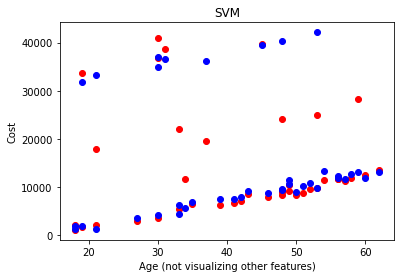

In [ ]:
plt.scatter(age[0:40], y_test[0:40], color = 'red')
plt.scatter(age[0:40], sc_y.inverse_transform(regressor.predict(X_test).reshape(-1, 1))[0:40], color = 'blue')
plt.title('SVM')
plt.xlabel('Age (not visualizing other features)')
plt.ylabel('Cost')
plt.show()

In [ ]:
sc_y.inverse_transform(regressor.predict(sc.transform([[19, 1, 28, 0, 0, 1, 0, 0]])).reshape(-1,1))

array([[1317.56607047]])

###Non-Linear

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, scaled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

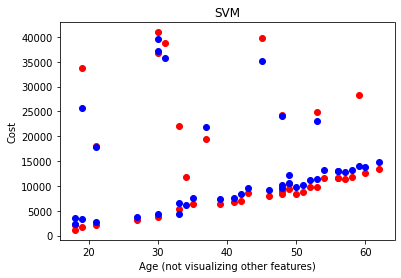

In [ ]:
plt.scatter(age[0:40], y_test[0:40], color = 'red')
plt.scatter(age[0:40], sc_y.inverse_transform(regressor.predict(X_test).reshape(-1, 1))[0:40], color = 'blue')
plt.title('SVM')
plt.xlabel('Age (not visualizing other features)')
plt.ylabel('Cost')
plt.show()

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

##Decision Trees (Trees and Forest)

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

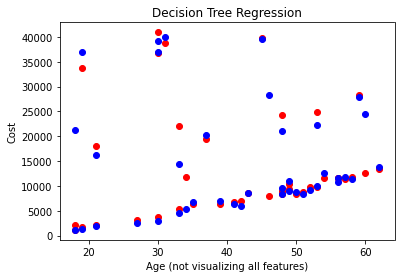

In [ ]:
plt.scatter(age[0:40], y_test[0:40], color = 'red')
plt.scatter(age[0:40], regressor.predict(X_test)[0:40], color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Age (not visualizing all features)')
plt.ylabel('Cost')
plt.show()

In [ ]:
regressor.predict(sc.transform([[19, 1, 28, 0, 0, 1, 0, 0]]))

array([2200.83085])

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

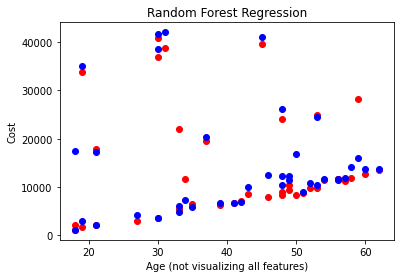

In [ ]:
plt.scatter(age[0:40], y_test[0:40], color = 'red')
plt.scatter(age[0:40], regressor.predict(X_test)[0:40], color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Age (not visualizing all features)')
plt.ylabel('Cost')
plt.show()

In [ ]:
regressor.predict(sc.transform([[19, 1, 28, 0, 0, 1, 0, 0]]))

array([2016.417985])

#Small Dataset

##Imports

In [ ]:
#Note: using "as" allows us to specify a name to call a library without having to use the fully qualified name
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Load and Process Data (Small Dataset)

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dataset = dataset.drop(columns=['Position'])

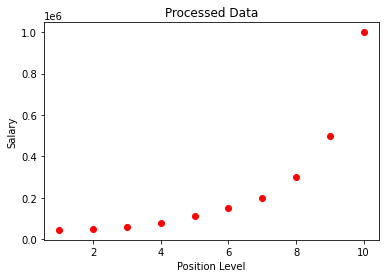

In [ ]:
plt.scatter(dataset.Level, dataset.Salary, color = 'red')
plt.title('Processed Data')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#x = dataset.Level
#y = dataset.Salary

x = dataset.iloc[:, 0].values.reshape(-1, 1)
y = dataset.iloc[:, -1].values.reshape(-1, 1)

##Linear Models

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

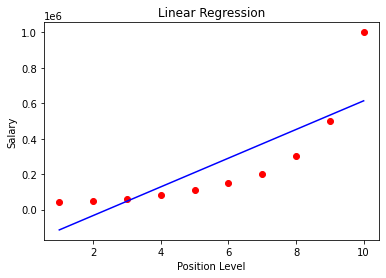

In [ ]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
lin_reg.predict([[6.5]])

array([[330378.78787879]])

##Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

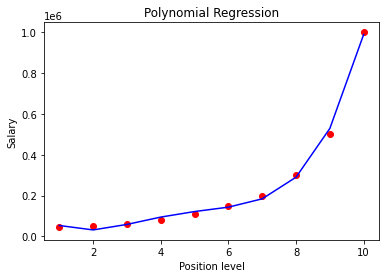

In [ ]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([[158862.45265155]])

##SVM (Linear and Non-Linear Kernel)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_x = sc_X.fit_transform(x)
scaled_y = sc_y.fit_transform(y)

###Linear

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(scaled_x, scaled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

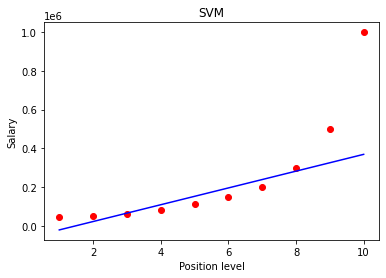

In [ ]:
plt.scatter(sc_X.inverse_transform(scaled_x), sc_y.inverse_transform(scaled_y), color = 'red')
plt.plot(sc_X.inverse_transform(scaled_x), sc_y.inverse_transform(regressor.predict(scaled_x).reshape(-1, 1)), color = 'blue')
plt.title('SVM')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[216903.83371158]])

###Non-Linear

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x, scaled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

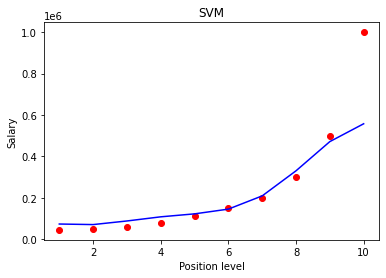

In [ ]:
plt.scatter(sc_X.inverse_transform(scaled_x), sc_y.inverse_transform(scaled_y), color = 'red')
plt.plot(sc_X.inverse_transform(scaled_x), sc_y.inverse_transform(regressor.predict(scaled_x).reshape(-1, 1)), color = 'blue')
plt.title('SVM')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

##Decision Trees (Trees and Forest)

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

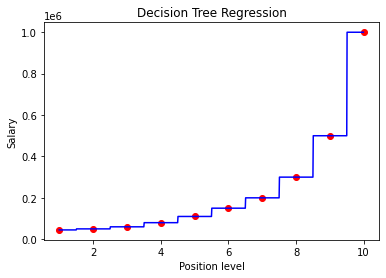

In [ ]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
regressor.predict([[6.5]])

array([150000.])

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

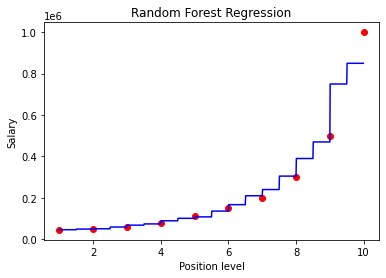

In [ ]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
regressor.predict([[6.5]])

array([167000.])